In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------
# 1) 데이터 불러오기
# -----------------------------

digits = datasets.load_digits()

In [235]:
# target에 어떤 숫자(클래스)가 있는지 확인
print("숫자 종류:", np.unique(digits.target))

숫자 종류: [0 1 2 3 4 5 6 7 8 9]


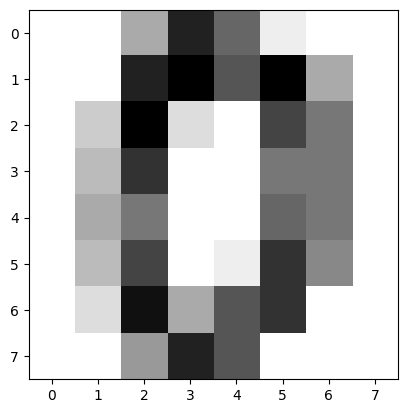

In [236]:
# 첫 번째 이미지(숫자)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [237]:
# -----------------------------
# 2) 특징(X)과 타겟(y) 분리
# -----------------------------

X = digits.data        # (1797, 64)
y = digits.target      # (1797,)

In [238]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [239]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [240]:
# -----------------------------
# 3) 데이터 스케일링
# -----------------------------

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [241]:
# -----------------------------
# 4) 타겟 변수 원-핫 인코딩
# -----------------------------

Y = pd.get_dummies(y).values

In [242]:
# -----------------------------
# 5) 훈련/테스트 데이터 분리
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=y
)

In [243]:
# 각 데이터 크기 출력
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257, 10), (540, 10))

In [244]:
# -----------------------------
# 6) 모델 구성
# -----------------------------

model = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")   # 클래스 수 = 10
])

In [245]:
# 모델 요약 정보 출력
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [246]:
# -----------------------------
# 7) 모델 컴파일
# -----------------------------

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
)

In [247]:
# -----------------------------
# 8) 모델 학습
# -----------------------------

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

In [248]:
# -----------------------------
# 9) 모델 예측
# -----------------------------

y_pred = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [249]:
# -----------------------------
# 10) 모델 정확도
# -----------------------------

# 원-핫 인코딩된 결과를 단일 클래스 레이블로 변환
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

acc = accuracy_score(y_test_class, y_pred_class)

print("--- MLP Test Accuracy ---")
print(f"Accuracy: {acc:.4f}")

--- MLP Test Accuracy ---
Accuracy: 0.9778


In [250]:
# -----------------------------
# 11) 추가 지표
# -----------------------------

print("\n혼동 행렬:")
print(confusion_matrix(y_test_class, y_pred_class))

print("\n분류 리포트:")
print(classification_report(y_test_class, y_pred_class))


혼동 행렬:
[[53  0  0  0  0  0  1  0  0  0]
 [ 0 54  0  0  1  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  1]
 [ 0  0  0  0 53  0  0  0  1  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  1  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  0  2  0  0 47  0]
 [ 0  0  0  0  0  0  0  0  1 53]]

분류 리포트:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       0.98      0.98      0.98        54
           5       0.96      0.98      0.97        55
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.94      0.90      0.92        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
  